Looking at the year 2020 October has the higest browsr traffic (makes sense given this is when the academic year starts). See image below for Google Analytics graph. I will use this a start point to parse the log files as I will assume that browser and programmatic usage is correlated.

<img src="ga2020.png" />

**Note** keep in mind that so far in the year of 2022 Google Analytics has max monthly browser traffic of ~11.5M page views in March which is ~15% more than the ~10M page views we are considering in October 2020.

First copy all of the log files for all of the servers for the month of October:
```
LOGS=/nfs/public/rw/homes/tc_uni01/uuw-stats/logs
DEST=/net/isilonP/public/rw/homes/uni_adm/tmp/log_parsing/2020-10/logs
for dd in {01..31}; do
  echo $dd;
  cat ${LOGS}/*/*2020-10-${dd}* > $DEST/2020-10-${dd}.log
done
```

Now run a parsing pipeline to collect:


1. Number of API-like requests for every minute of the month. API-like means:
 - Not a file used for the front-end eg CSS, JS, png, jpg etc
 - Include bots as they also contribute to server load
 - Count non-200s. This is overcautious as these will not contribute much to load but my thinking is we want to overestimate server load rather than underestimate
 
2. Parse the log files and store as CSVs so that we can recreate the requests. For this step non-200s were discarded but browser, programmtic and bots were included. Extract the following columns:
 - `datetime` the datetime of the request
 - `user_type` programmatic or browser
 - `method` GET, POST etc
 - `resource` the path to the resource
 

The pipeline was run on the `all-traffic` branch of https://github.com/ebi-uniprot/uniprot-log-file-parser/tree/all-
traffic. The combined results of this are stored here:

# Pipeline results

In [1]:
!ls -lh /nfs/public/rw/homes/uni_adm/tmp/log_parsing/2020-10/results/reduce

total 3.6G
-rw-r--r-- 1 dlrice swissprot 858K May 13 08:07 n-requests.csv
-rw-r--r-- 1 dlrice swissprot 3.0G May 13 08:08 parsed.csv


In [2]:
import os
import pandas as pd

dir_work = '/nfs/public/rw/homes/uni_adm/tmp/log_parsing/2020-10'
dir_reduce = os.path.join(dir_work,'results/reduce')

# Number of requests / minute

Load the number of requests per minute and sort by minute:

In [3]:
n_requests = pd.read_csv(os.path.join(dir_reduce, 'n-requests.csv'), names=['datetime','requests'], parse_dates=['datetime'])
n_requests.sort_values('requests', ascending=False).head(50)

,datetime,requests
10796,2020-10-08 11:50:00,10588
25490,2020-10-18 16:35:00,10204
25451,2020-10-18 15:56:00,10121
25489,2020-10-18 16:34:00,10078
10795,2020-10-08 11:49:00,10068
25483,2020-10-18 16:28:00,10050
25502,2020-10-18 16:48:00,10040
25484,2020-10-18 16:29:00,10018
10786,2020-10-08 11:40:00,9999
39934,2020-10-28 17:13:00,9971


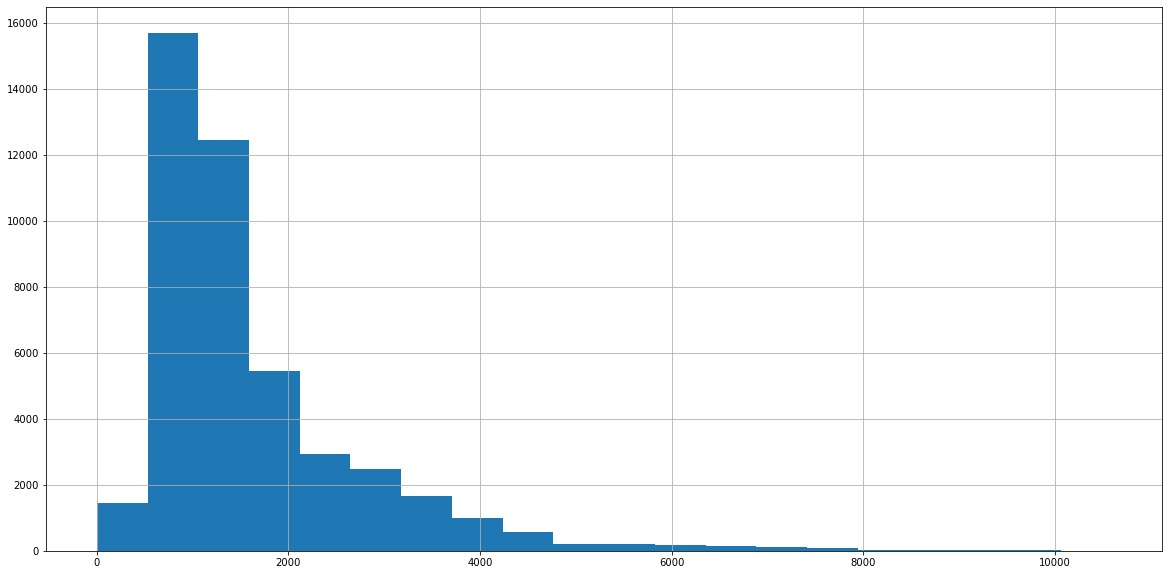

In [4]:
n_requests['requests'].hist(bins=20, figsize=(20,10));

In [5]:
200*60

12000

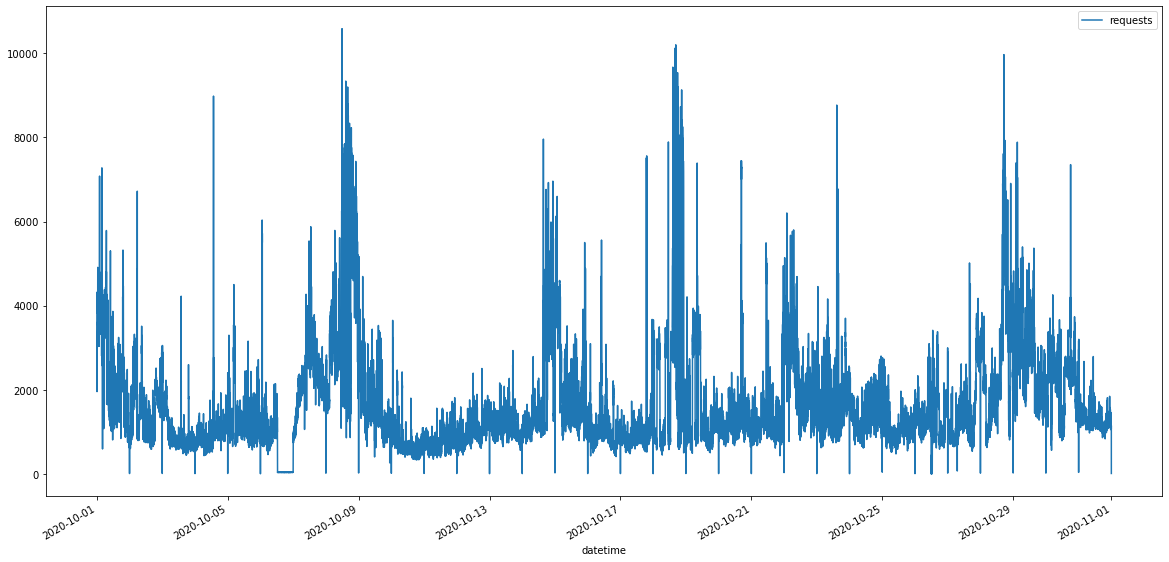

In [6]:
n_requests.plot(x='datetime', y='requests', figsize=(20,10));

Note that 8, 18, 28 occupy the top four spots of highest traffic days as seen in the parsed log file sizes below:

In [7]:
!ls -lhS /nfs/public/rw/homes/uni_adm/tmp/log_parsing/2020-10/results/map | head -n 5

total 3.6G
-rw-r--r-- 1 dlrice swissprot 251M May 12 23:02 2020-10-18.log.parsed.csv
-rw-r--r-- 1 dlrice swissprot 222M May 12 23:30 2020-10-08.log.parsed.csv
-rw-r--r-- 1 dlrice swissprot 198M May 12 23:14 2020-10-29.log.parsed.csv
-rw-r--r-- 1 dlrice swissprot 164M May 12 23:12 2020-10-28.log.parsed.csv


In [8]:
!cal 10 2020

    October 2020    
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30 31



Looking at the calendar, having the 18th, a Sunday, occupy the top spot is odd so this would presumably be a single programmatic user skewing the results. But we have to include as these are still just requests hitting the server.

# Parsed 200 programmatic, browser & bots requests

In [9]:
parsed = pd.read_csv(os.path.join(dir_reduce, 'parsed.csv'), names= ["datetime", "user_type", "method", "resource"], parse_dates=['datetime'])

In [10]:
parsed

,datetime,user_type,method,resource
0,2020-10-01 00:00:00,bot,GET,/uniprot/A0A0M4BZ26.xml
1,2020-10-01 00:00:00,bot,GET,/uniprot/A0A5I4KP38.xml
2,2020-10-01 00:00:00,bot,GET,/uniprot/B9UD53.xml
3,2020-10-01 00:00:00,bot,GET,/uniprot/A0A163QKA2.xml
4,2020-10-01 00:00:00,bot,GET,/uniprot/A0A401ANM6.xml
...,...,...,...,...
54487633,2020-10-31 23:10:00,programmatic,HEAD,/uniprot/P12345
54487634,2020-10-31 23:20:00,programmatic,HEAD,/uniprot/P12345
54487635,2020-10-31 23:30:00,programmatic,HEAD,/uniprot/P12345
54487636,2020-10-31 23:40:00,programmatic,HEAD,/uniprot/P12345


The length of this dataframe is 54,487,638 meaning there were this many succssfuul programmatic, browser & bots requests in the month of October 2020.

Have a look at the breakdown of user_type and HTTP method:

In [11]:
parsed['user_type'].value_counts()

bot             32968874
programmatic    12540795
browser          8977969
Name: user_type, dtype: int64

In [12]:
parsed['method'].value_counts()

GET        54003004
POST         349347
HEAD         135273
OPTIONS          14
Name: method, dtype: int64

Note that `programmatic:browser` ratio is roughly `1.5:1` for this month which is different to the annual average I have seen before of `3:1`

# Work below is work in progress

In [13]:
import re
from urllib.parse import urlparse, parse_qs
from toolz import functoolz

re_uninprot_path = re.compile(r'^/uniprot/')
re_file_ext = re.compile(r'.+/.+\.(fasta|gff|json|list|obo|rdf|tab|tsv|txt|xlsx|xml)$')

def tm_uniprot(resource):
    return re.sub(re_uninprot_path, '/uniprotkb/', resource)

def tm_stream(resource):
    parsed_url = urlparse(resource)
    if 'format' in parse_qs(parsed_url.query):
        parsed_url = parsed_url._replace(path=os.path.join(parsed_url.path, 'stream'))
        resource = parsed_url.geturl()
    return resource

In [14]:
parsed['resource_tm_uniprot'] = parsed['resource'].map(tm_uniprot)

In [15]:
parsed

,datetime,user_type,method,resource,resource_tm_uniprot
0,2020-10-01 00:00:00,bot,GET,/uniprot/A0A0M4BZ26.xml,/uniprotkb/A0A0M4BZ26.xml
1,2020-10-01 00:00:00,bot,GET,/uniprot/A0A5I4KP38.xml,/uniprotkb/A0A5I4KP38.xml
2,2020-10-01 00:00:00,bot,GET,/uniprot/B9UD53.xml,/uniprotkb/B9UD53.xml
3,2020-10-01 00:00:00,bot,GET,/uniprot/A0A163QKA2.xml,/uniprotkb/A0A163QKA2.xml
4,2020-10-01 00:00:00,bot,GET,/uniprot/A0A401ANM6.xml,/uniprotkb/A0A401ANM6.xml
...,...,...,...,...,...
54487633,2020-10-31 23:10:00,programmatic,HEAD,/uniprot/P12345,/uniprotkb/P12345
54487634,2020-10-31 23:20:00,programmatic,HEAD,/uniprot/P12345,/uniprotkb/P12345
54487635,2020-10-31 23:30:00,programmatic,HEAD,/uniprot/P12345,/uniprotkb/P12345
54487636,2020-10-31 23:40:00,programmatic,HEAD,/uniprot/P12345,/uniprotkb/P12345


In [16]:
parsed['resource_tm_uniprot_stream'] = parsed['resource_tm_uniprot'].map(tm_stream)

In [29]:
parsed[parsed['resource'].str.contains('format=')]

,datetime,user_type,method,resource,resource_tm_uniprot,resource_tm_uniprot_stream
459,2020-10-01 00:00:00,programmatic,GET,/uniprot/?query=A0A0K8QRU8_9BACT&format=tab&co...,/uniprotkb/?query=A0A0K8QRU8_9BACT&format=tab&...,/uniprotkb/stream?query=A0A0K8QRU8_9BACT&forma...
1168,2020-10-01 00:01:00,programmatic,GET,/uniprot/?query=A0A520X5Y4_9GAMM&format=tab&co...,/uniprotkb/?query=A0A520X5Y4_9GAMM&format=tab&...,/uniprotkb/stream?query=A0A520X5Y4_9GAMM&forma...
1734,2020-10-01 00:02:00,programmatic,GET,/uniprot/?query=A0A661P4P6_9DELT&format=tab&co...,/uniprotkb/?query=A0A661P4P6_9DELT&format=tab&...,/uniprotkb/stream?query=A0A661P4P6_9DELT&forma...
2155,2020-10-01 00:02:00,browser,GET,/news/?format=rss,/news/?format=rss,/news/stream?format=rss
2590,2020-10-01 00:03:00,programmatic,GET,/uniprot/?query=A0A3C0QA77_9GAMM&format=tab&co...,/uniprotkb/?query=A0A3C0QA77_9GAMM&format=tab&...,/uniprotkb/stream?query=A0A3C0QA77_9GAMM&forma...
...,...,...,...,...,...,...
54484319,2020-10-31 23:56:00,programmatic,POST,/uniprot/P59594&format=txt,/uniprotkb/P59594&format=txt,/uniprotkb/P59594&format=txt
54484725,2020-10-31 23:58:00,programmatic,POST,/uniprot/P37619&format=fasta,/uniprotkb/P37619&format=fasta,/uniprotkb/P37619&format=fasta
54484985,2020-10-31 23:59:00,programmatic,GET,/uniprot/?query=accession:Q94K73&format=tab&co...,/uniprotkb/?query=accession:Q94K73&format=tab&...,/uniprotkb/stream?query=accession:Q94K73&forma...
54485015,2020-10-31 23:59:00,programmatic,GET,/uniprot/?query=accession:Q7TXL9&format=tab&co...,/uniprotkb/?query=accession:Q7TXL9&format=tab&...,/uniprotkb/stream?query=accession:Q7TXL9&forma...


In [28]:
parsed[parsed['resource'].str.contains('query')]

,datetime,user_type,method,resource,resource_tm_uniprot,resource_tm_uniprot_stream
71,2020-10-01 00:00:00,browser,GET,/help/?fil=section:biocuration&query=*,/help/?fil=section:biocuration&query=*,/help/?fil=section:biocuration&query=*
103,2020-10-01 00:00:00,browser,GET,/uniprot/?query=organism:83333+pathway:399.78&...,/uniprotkb/?query=organism:83333+pathway:399.7...,/uniprotkb/?query=organism:83333+pathway:399.7...
163,2020-10-01 00:00:00,browser,GET,/help/?fil=category:Chordata&query=*,/help/?fil=category:Chordata&query=*,/help/?fil=category:Chordata&query=*
182,2020-10-01 00:00:00,browser,GET,/help/?fil=category:Expression&query=*,/help/?fil=category:Expression&query=*,/help/?fil=category:Expression&query=*
199,2020-10-01 00:00:00,browser,GET,/help/?fil=category:Fungi&query=*,/help/?fil=category:Fungi&query=*,/help/?fil=category:Fungi&query=*
...,...,...,...,...,...,...
54487485,2020-10-31 23:44:00,bot,GET,"/taxonomy/?query=human&fil=ancestor:""Eukaryota...","/taxonomy/?query=human&fil=ancestor:""Eukaryota...","/taxonomy/?query=human&fil=ancestor:""Eukaryota..."
54487487,2020-10-31 23:45:00,bot,GET,/uniparc/?query=database:trembl-new&sort=score,/uniparc/?query=database:trembl-new&sort=score,/uniparc/?query=database:trembl-new&sort=score
54487490,2020-10-31 23:54:00,bot,GET,/taxonomy/?query=human&sort=score,/taxonomy/?query=human&sort=score,/taxonomy/?query=human&sort=score
54487491,2020-10-31 23:54:00,bot,GET,"/taxonomy/?query=human&fil=ancestor:""Eukaryota...","/taxonomy/?query=human&fil=ancestor:""Eukaryota...","/taxonomy/?query=human&fil=ancestor:""Eukaryota..."


In [33]:
parsed.loc[103]['resource_tm_uniprot_stream']

'/uniprotkb/?query=organism:83333+pathway:399.78&sort=score'

In [17]:
import numpy as np

analysis_dir = os.path.join(dir_work, 'results/analysis')

groups_parsed = parsed.groupby(['method', 'user_type'])

In [18]:
for method in ['GET']:
    for user_type in ['bot', 'programmatic', 'browser']:
        try:
            group = groups_parsed.get_group((method, user_type))
        except KeyError:
            continue
        for column in ['resource_tm_uniprot', 'resource_tm_uniprot_stream']:
            np.savetxt(os.path.join(analysis_dir, '2022-05-16', f'{method}-{user_type}-{column}.txt'),
                       group[column].unique(),
                       fmt='%s')

1. Apply TM rules
    1. with stream
    2. without stream
2. Transform queries, columns as much as possible. Discard complex queries eg (AND, OR)
3. How many referrals come from search engines?
4. Get propotion of 200s/400s/500s in total traffic counts

In [20]:
prog = pd.read_csv(os.path.join(analysis_dir, '2022-05-16', 'GET-programmatic-resource_tm_uniprot_stream.txt'), names=['resource'])
brow = pd.read_csv(os.path.join(analysis_dir, '2022-05-16', 'GET-browser-resource_tm_uniprot_stream.txt'), names=['resource'])

In [22]:
gets = pd.concat([prog, brow])

In [23]:
gets

,resource
0,/uniprotkb/Q86XU0.fasta
1,/mapping/M20201001A94466D2655679D1FD8953E07519...
2,/uniprotkb/Q7Z7H8.fasta
3,/uniprotkb/stream?query=A0A0K8QRU8_9BACT&forma...
4,/mapping/M20201001A94466D2655679D1FD8953E07519...
...,...
2788805,/uniprotkb/?query=3999&sort=score
2788806,/uniprotkb/A0A3P8W2N1
2788807,/uniprotkb/Q66KL4/publications
2788808,/uniprotkb/F1NQL9


In [239]:
re_namespace_exclude = re.compile(r'^/mappings?|/blast|/align|/sparql|/peptidesearch|/uploadlists', re.IGNORECASE)
re_query_exclude = re.compile(r'yourlist:|\.rss|format=rss|job:|annotation:', re.IGNORECASE)

def filter_request(resource):
    return not (
        re_namespace_exclude.match(resource) or 
        re_query_exclude.search(resource))


re_organism_taxonomy = re.compile(r'(?P<field>organism|taxonomy):((\".*\[(?P<id1>\d+)\]\")|(?P<id2>\d+))', re.IGNORECASE)
re_ext = re.compile(r'\.(?P<ext>fasta|tsv|xlsx|xml|rdf|txt|gff|list|json|obo)', re.IGNORECASE)
#re_tab = re.compile(r'\.tab', re.IGNORECASE)

ext_to_media_type = {
    "fasta": "text/plain; format=fasta",
    "tsv": "text/plain; format=tsv",
    "xlsx": "application/vnd.ms-excel",
    "xml": "application/xml",
    "rdf": "application/rdf+xml",
    "txt": "text/plain; format=flatfile",
    "gff": "text/plain; format=gff",
    "list": "text/plain; format=list",
    "json": "application/json",
    "obo": "text/plain; format=obo"
}

def transform_request(resource):
    parsed_url = urlparse(resource)
    parsed_qs = parse_qs(parsed_url.query)
    if 'sort' in parsed_qs and 'score' in parsed_qs['sort']:
        parsed_qs.pop('sort')
    if 'query' in parsed_qs:
        if 'format' not in parsed_qs:
            parsed_url = parsed_url._replace(path=os.path.join(parsed_url.path, 'search'))
        m = re_organism_taxonomy.match(parsed_qs['query'][0])
        if m:
            field = m.group('field')
            value = m.group('id1') or m.group('id2')
            parsed_qs['query'] = f'{field}_id:{value}'
    if 'format' in parsed_qs and parsed_qs['format'][0] == 'tab':
        parsed_qs['format'] = 'tsv'
    if parsed_url.path.endswith('.tab'):
        parsed_url = parsed_url._replace(path=parsed_url.path.replace('.tab', '.tsv'))
    parsed_url = parsed_url._replace(query=urlencode(parsed_qs, True))
    resource = urllib.parse.unquote(parsed_url.geturl())
    
    m = re_ext.search(resource)
    if ('query' in parsed_qs and 'format' in parsed_qs and parsed_qs['format'][0] in ext_to_media_type):
        media_type = ext_to_media_type[parsed_qs['format'][0]]
        resource = f'{resource}#{media_type}'
    elif m and m.group('ext') in ext_to_media_type:
        media_type = ext_to_media_type[m.group('ext')]
        resource = f'{resource}#{media_type}'
    else:
        media_type = ext_to_media_type['json']
        resource = f'{resource}#{media_type}'
    return resource


In [240]:
test_cases = [
    '/uniprotkb/?query=organism:83333+pathway:399.78&sort=score',
    '/blast/uniprot/B20200930216DA2B77BFBD2E6699CA9B6D1C41EB221828EM.ali?alignment=115',
    '/mapping/M20201001E5A08BB0B2D1C45B0C7BC3B55FD26556BC6AAFM',
    '/uniprotkb/P0AE13.rss?version=*',
    '/uniref/stream?format=rss&limit=25&offset=0&query=*',
    '/uniprotkb/?query=goa:("biological_process [0008150]") yourlist:M202010018471C63D39733769F8E060B506551E12BCF0DF0',
    '/taxonomy/348017',
    '/uniprotkb/P05067.txt',
    '/uniprotkb/P05067.tab',
    '/uniref/stream?format=tab&limit=25&offset=0&query=*',
    '/uniref/stream?query=taxonomy:"Bacillus [1386]" OR taxonomy:"Bacillus [55087]" identity:1.0 NOT count:[2 TO 10000000000]&format=list&force=true&sort=score&compress=yes',
]

In [241]:
for test_case in test_cases:
    print(test_case)
    if not filter_request(test_case):
        print('removed')
    else: 
        print(transform_request(test_case))
    print('-'*10)

/uniprotkb/?query=organism:83333+pathway:399.78&sort=score
/uniprotkb/search?query=organism_id:83333#application/json
----------
/blast/uniprot/B20200930216DA2B77BFBD2E6699CA9B6D1C41EB221828EM.ali?alignment=115
removed
----------
/mapping/M20201001E5A08BB0B2D1C45B0C7BC3B55FD26556BC6AAFM
removed
----------
/uniprotkb/P0AE13.rss?version=*
removed
----------
/uniref/stream?format=rss&limit=25&offset=0&query=*
removed
----------
/uniprotkb/?query=goa:("biological_process [0008150]") yourlist:M202010018471C63D39733769F8E060B506551E12BCF0DF0
removed
----------
/taxonomy/348017
/taxonomy/348017#application/json
----------
/uniprotkb/P05067.txt
/uniprotkb/P05067.txt#text/plain; format=flatfile
----------
/uniprotkb/P05067.tab
/uniprotkb/P05067.tsv#text/plain; format=tsv
----------
/uniref/stream?format=tab&limit=25&offset=0&query=*
/uniref/stream?format=tsv&limit=25&offset=0&query=*#application/json
----------
/uniref/stream?query=taxonomy:"Bacillus [1386]" OR taxonomy:"Bacillus [55087]" ident

In [208]:
gets_filtered = gets[gets['resource'].apply(filter_request)].copy()

In [210]:
len(gets_filtered)

6427852

In [211]:
gets_filtered

,resource
0,/uniprotkb/Q86XU0.fasta
2,/uniprotkb/Q7Z7H8.fasta
3,/uniprotkb/stream?query=A0A0K8QRU8_9BACT&forma...
10,/uniprotkb/stream?query=A0A520X5Y4_9GAMM&forma...
12,/uniprotkb/stream?query=A0A661P4P6_9DELT&forma...
...,...
2788804,/uniprotkb/B3NBL1
2788805,/uniprotkb/?query=3999&sort=score
2788806,/uniprotkb/A0A3P8W2N1
2788807,/uniprotkb/Q66KL4/publications


In [242]:
gets_filtered['transformed_resource'] = gets_filtered['resource'].apply(transform_request)

In [243]:
gets_filtered

,resource,transformed_resource
0,/uniprotkb/Q86XU0.fasta,/uniprotkb/Q86XU0.fasta#text/plain; format=fasta
2,/uniprotkb/Q7Z7H8.fasta,/uniprotkb/Q7Z7H8.fasta#text/plain; format=fasta
3,/uniprotkb/stream?query=A0A0K8QRU8_9BACT&forma...,/uniprotkb/stream?query=A0A0K8QRU8_9BACT&forma...
10,/uniprotkb/stream?query=A0A520X5Y4_9GAMM&forma...,/uniprotkb/stream?query=A0A520X5Y4_9GAMM&forma...
12,/uniprotkb/stream?query=A0A661P4P6_9DELT&forma...,/uniprotkb/stream?query=A0A661P4P6_9DELT&forma...
...,...,...
2788804,/uniprotkb/B3NBL1,/uniprotkb/B3NBL1#application/json
2788805,/uniprotkb/?query=3999&sort=score,/uniprotkb/search?query=3999#application/json
2788806,/uniprotkb/A0A3P8W2N1,/uniprotkb/A0A3P8W2N1#application/json
2788807,/uniprotkb/Q66KL4/publications,/uniprotkb/Q66KL4/publications#application/json


In [244]:
gets_filtered.to_csv(
    os.path.join(analysis_dir, '2022-05-16', 'filtered-transformed-GET-browser-programmatic'),
    columns=['transformed_resource'],
    header=False,
    index=False
)